# Mesh Magnets

Here we will show examples of importing STL meshes as magnets.

In [1]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab. Installing package from pypi')
    !pip install pymagnet -q
    print("Getting stl files")
    !mkdir stl
    !wget https://raw.githubusercontent.com/pdunne/pymagnet/main/examples/notebooks/STL%20Magnets/stl/HalfDonut.stl -O stl/HalfDonut.stl -q
    !wget https://github.com/pdunne/pymagnet/raw/main/examples/notebooks/STL%20Magnets/stl/hollow_hex.STL -O stl/hollow_hex.stl -q
    !wget https://github.com/pdunne/pymagnet/raw/main/examples/notebooks/STL%20Magnets/stl/star.STL -O stl/star.stl -q
    !wget https://github.com/pdunne/pymagnet/raw/main/examples/notebooks/STL%20Magnets/stl/cube.STL -O stl/cube.stl -q
    !wget https://github.com/pdunne/pymagnet/raw/main/examples/notebooks/STL%20Magnets/stl/pentagon_prism.STL -O stl/pentagon_prism.stl -q
    print("Done.")
else:
    print('Not running on CoLab.')

Not running on CoLab.


In [2]:
%matplotlib inline
# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'
import pymagnet as pm
import numpy as np

In [3]:
PI = np.pi


def gen_mesh_mag(path, file, Jr=1.0, theta=0, phi=0, alpha=0, beta=0, gamma=0):
    pm.reset_magnets()
    center = (0, 0, 0)
    m_mesh = pm.magnets.Mesh(
        path + file,
        Jr=Jr,
        center=center,
        theta=theta,
        phi=phi,
        alpha=alpha,
        beta=beta,
        gamma=gamma,
    )
    return m_mesh

The below code will import an STL file, "HalfDonut" and render it. The plot should look like:

![Donut Mesh](img/donut_mesh.png)


In [ ]:
mask_magnet = False  # mask values inside a magnet - doesn't work for Mesh magnets
show_magnets = True  # draw magnet in plots

mesh_list = ["hollow_hex.stl", "cube.stl", "star.stl", "pentagon_prism.stl", "HalfDonut.stl"]

mesh_file = mesh_list[4] # change from 0 - 4 to see different magnets

mesh_magnet = gen_mesh_mag(
    path ='stl/',
    file = mesh_file,
    Jr=1.0,
    theta=0,
    phi=0,
    alpha=0,
    beta=0,
    gamma=0,
)

mask_magnet = False  # mask values inside a magnet - doesn't work for Mesh magnets
show_magnets = True  # draw magnet in plots

mesh_list = ["hollow_hex.stl", "cube.stl", "star.stl", "pentagon_prism.stl", "HalfDonut.stl"]

mesh_file = mesh_list[4] # change from 0 - 4 to see different magnets

mesh_magnet = gen_mesh_mag(
    path ='stl/',
    file = mesh_file,
    Jr=1.0,
    theta=0,
    phi=0,
    alpha=0,
    beta=0,
    gamma=0,
)

print(f"{mesh_file} has {len(mesh_magnet.mesh_vectors)} simplexes")

fig = pm.plots.plot_magnet()

fig = pm.plots.plot_magnet()


A slice plot which should look like:

![Slice Volume](img/donut_slice.png)


In [ ]:
fig, slice_cache, data_objects = pm.plots.slice_quickplot(
    cmax=0.3,
    num_levels=6,
    num_points=40,
    opacity=0.7,
    num_arrows=10,
    cone_opacity=0.3,
    show_magnets=True,
    max1=2,
    max2=2,
    slice_value=0.0,
)

2D contour slices can be generated for each plane in the generated data

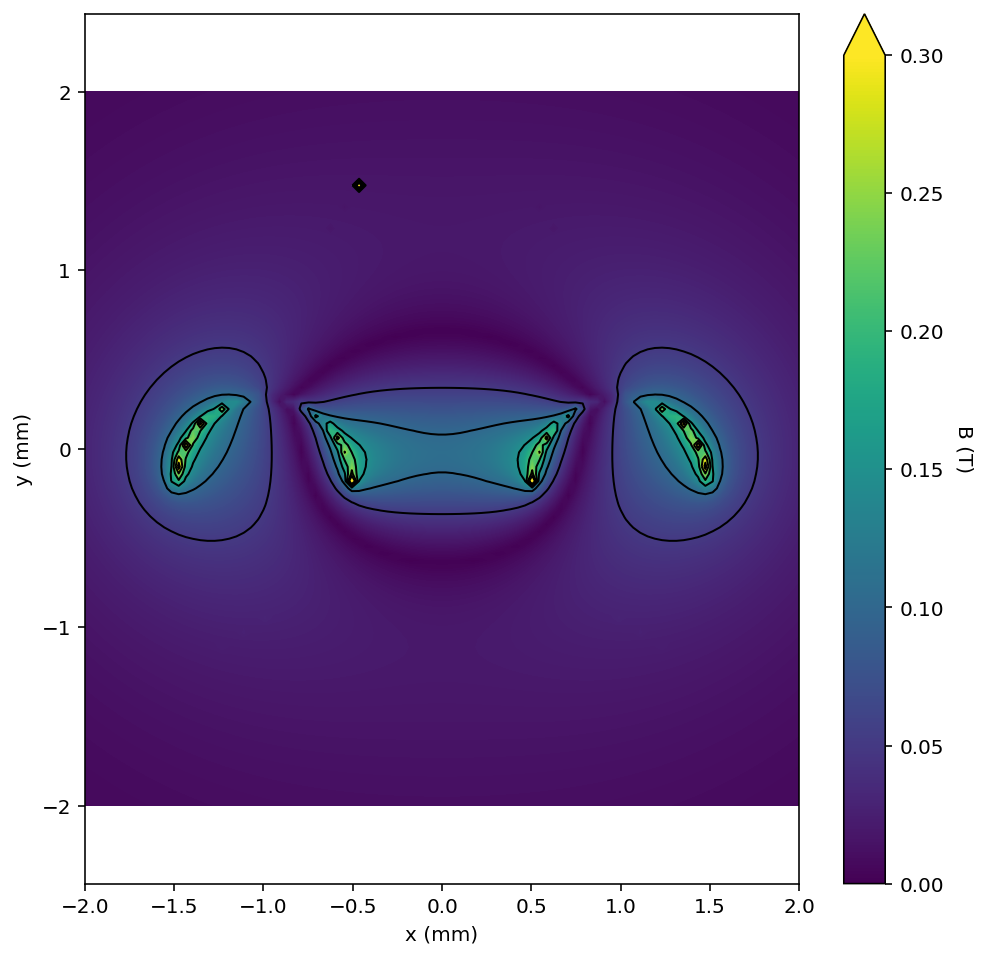

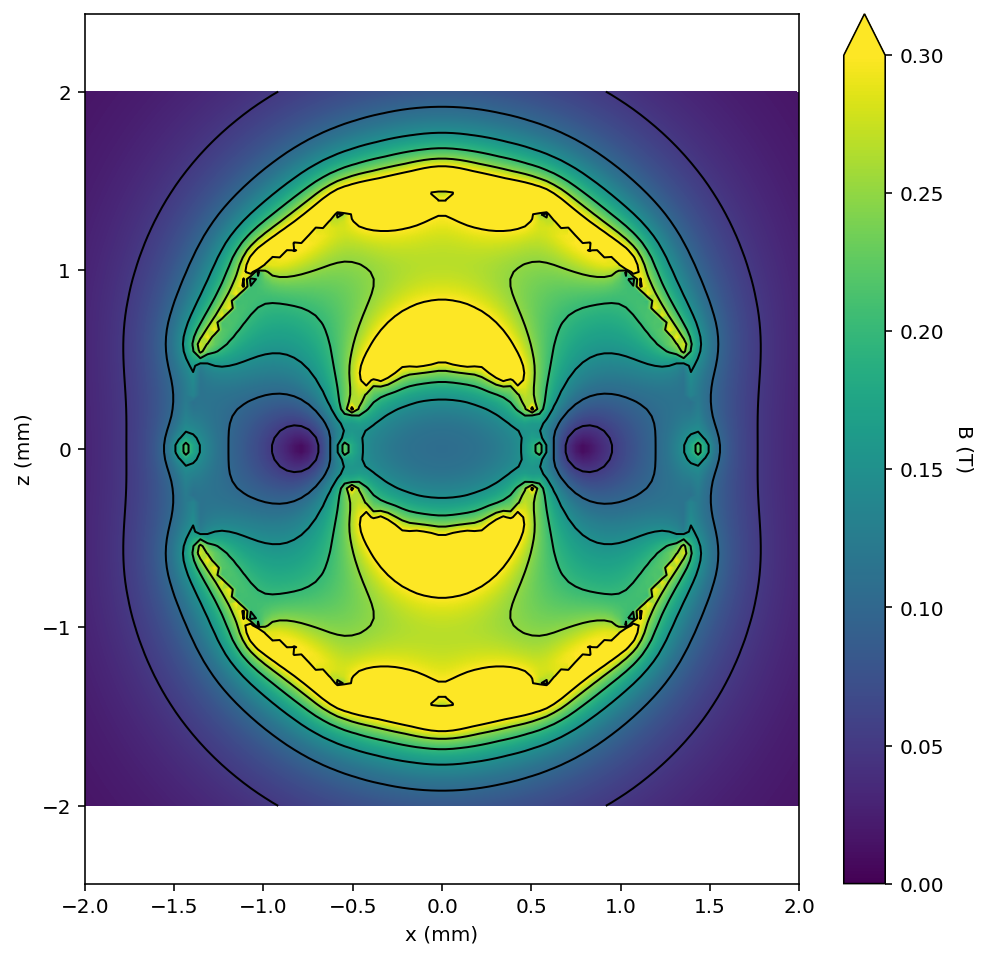

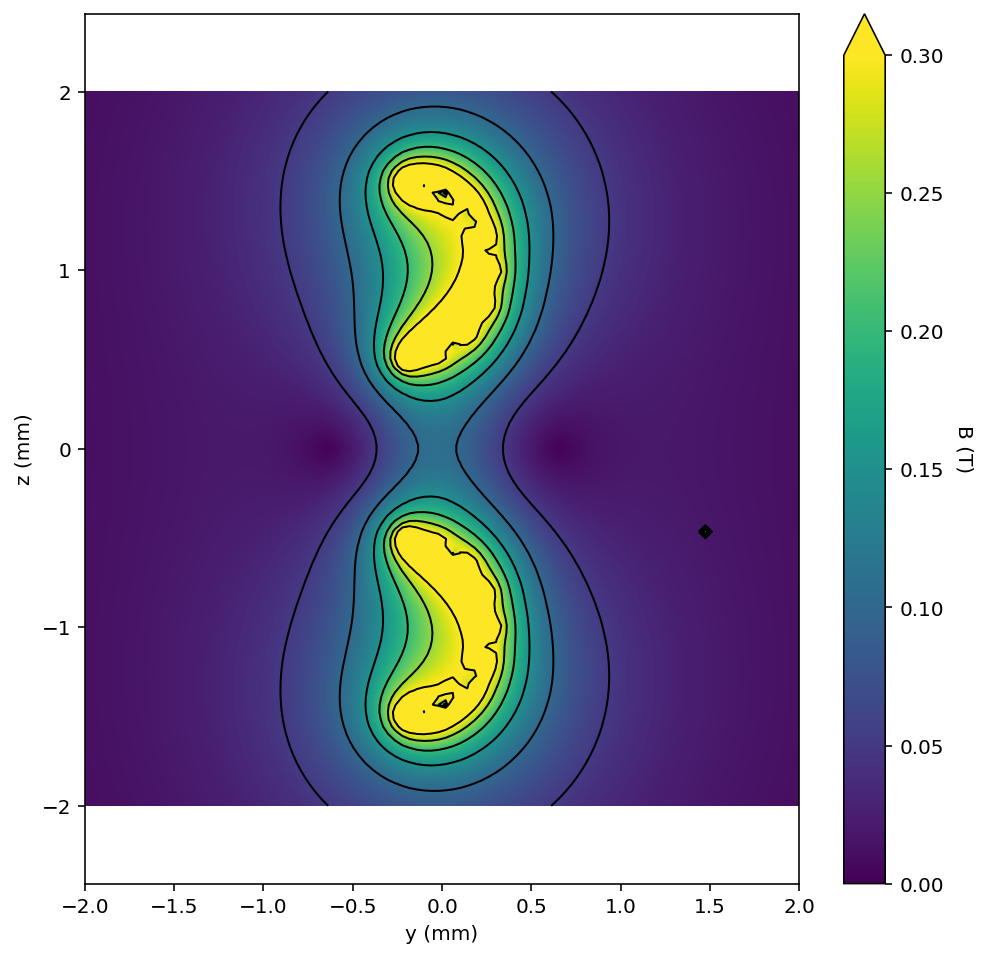

In [18]:
for plane in slice_cache.keys():
    pm.plots.plot_3D_contour(slice_cache[plane]['points'], slice_cache[plane]['field'], plane,
                             cmin = 0,
                             cmax=0.3,
                             num_levels=7,
                             cmap='viridis',
#                              num_arrows = 11,
#                              vector_color = 'k'
                            )

A volume plot which should look like:

![Donut Volume](img/donut_volume.png)


In [ ]:
fig_vol, vol_cache, data_objects = pm.plots.volume_quickplot(cmin=0.0,
                                    cmax=0.5,
                                    opacity=0.3,
                                    magnet_opacity=1.0,
                                    no_caps=True,
                                    num_levels=6,
                                    num_points=30,
                                    show_magnets = True,
                                    xmax = 2,
                                    ymax = 2,
                                    zmax = 2,
                                    unit = 'mm',
                                    opacityscale = 'normal',
#                                     isomin=0.05,
#                                     isomax=0.5,
                                   )
